# Chapter 1

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Perceptron


Here I will implement and apply to a artificial datase

Creating artificial data

In [2]:
data = pd.DataFrame()

In [3]:
data['xo'] = [1]*1000

In [4]:
np.random.seed(123455)

In [5]:
data['x1'] = np.random.rand(1000)
data['x2'] = np.random.rand(1000)

In [6]:
data.head()

,xo,x1,x2
0,1,0.534412,0.210234
1,1,0.878955,0.604161
2,1,0.714712,0.405159
3,1,0.742721,0.205504
4,1,0.103899,0.814639


Labelling it up or down the curve x2 + 3x1 = 1.3

In [7]:
def labelling(x1, x2):
    if 3*x1 + x2 > 1.3:
        return 1
    else:
        return -1

In [8]:
data['y'] = data.apply(lambda x : labelling(x.x1, x.x2), axis=1)

In [9]:
data.head()

,xo,x1,x2,y
0,1,0.534412,0.210234,1
1,1,0.878955,0.604161,1
2,1,0.714712,0.405159,1
3,1,0.742721,0.205504,1
4,1,0.103899,0.814639,-1


Setting the initial w

In [10]:
w0 = np.random.rand(3)
w0

array([0.93205095, 0.10767264, 0.25590951])

In [11]:
def predict(w, X):
    """ 
    Predicting the class of the point x
    w is the array
    X is a pandas DataFrame
    """    
    return np.sign(np.matmul(w, X.transpose()))

Finding wrong predictions

In [12]:
X = data.iloc[:,:-1]

In [13]:
wrong = data[predict(w0,X) != data.y]
wrong.head()

,xo,x1,x2,y
4,1,0.103899,0.814639,-1
6,1,0.121624,0.120564,-1
9,1,0.082381,0.752571,-1
15,1,0.203797,0.154518,-1
20,1,0.035819,0.094828,-1


In [14]:
len(wrong)

266

Iterations of the algorithm

In [15]:
while len(wrong) > 0:
    obs = wrong.sample(1)
    x = np.asarray(obs)[0][:-1]
    y = np.asarray(obs)[0][-1]
    w = w0 + x*y
    wrong = data[predict(w,X) != data.y]
    w0 = w

In [16]:
w

array([-7.06794905, 16.33988507,  5.37562379])

Fitted equation:

Sign of -7.06794905 + x1 * 16.33988507 + x2 * 5.37562379

-7.06794905 + x1 * 16.33988507 + x2 * 5.37562379 = 0

x2 = (7.06794905 - x1 * 16.33988507) / 5.37562379

Plotting results

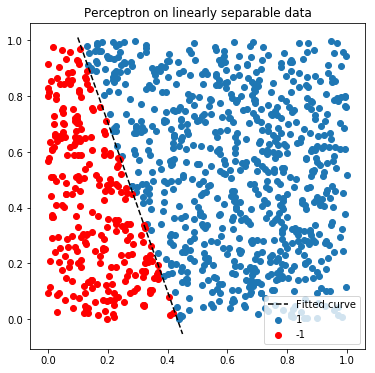

In [17]:
data1 = data[data.y == 1]
data0 = data[data.y == -1]

fig = plt.figure(figsize=(6, 6), frameon=False)

plt.scatter(data1.x1, data1.x2, label='1')
plt.scatter(data0.x1, data0.x2, color='r', label='-1')
p1 = 0.1
p2 = 0.45
px = [p1, p2]
py = [(7.06794905 - p1 * 16.33988507) / 5.37562379, (7.06794905 - p2 * 16.33988507) / 5.37562379]
plt.plot(px, py, linestyle='dashed', color='black', label='Fitted curve')
plt.title("Perceptron on linearly separable data")
plt.legend(loc='lower right')